In [158]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt    # we will also use the matplotlib visualisation library
import warnings
warnings.simplefilter('ignore', category=UserWarning)  # suppresses warning message from Seaborn
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# command below ensures matplotlib output can be included in Notebook

%matplotlib inline

In [130]:
df = pd.read_csv("data/Player Per Game.csv") # load dataset into a dataframe

# removing players from seasons prior to 2013 - prior to the modern era of basketball
df = df.drop(df[df.season < 2013].index)


# Cleaning Data

## Exploring size of data and variable types

In [131]:
df.columns # list all the different columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp_per_game', 'fg_per_game',
       'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game',
       'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
       'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game'],
      dtype='object')

In [132]:
df.dtypes # returns the datatype of each column

seas_id            int64
season             int64
player_id          int64
player            object
birth_year       float64
pos               object
age              float64
experience         int64
lg                object
tm                object
g                  int64
gs               float64
mp_per_game      float64
fg_per_game      float64
fga_per_game     float64
fg_percent       float64
x3p_per_game     float64
x3pa_per_game    float64
x3p_percent      float64
x2p_per_game     float64
x2pa_per_game    float64
x2p_percent      float64
e_fg_percent     float64
ft_per_game      float64
fta_per_game     float64
ft_percent       float64
orb_per_game     float64
drb_per_game     float64
trb_per_game     float64
ast_per_game     float64
stl_per_game     float64
blk_per_game     float64
tov_per_game     float64
pf_per_game      float64
pts_per_game     float64
dtype: object

In [133]:
df.shape # returns the shape of data - rows and columns

(7150, 35)

In [134]:
df.index

RangeIndex(start=0, stop=7150, step=1)

## Preliminary exploration of values in the data

In [153]:
df.sample(10) # view random rows

,season,player_id,player,pos,age,experience,tm,g,gs,mp_per_game,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
3464,2019,4371,Willie Cauley-Stein,C,25.0,4,SAC,81,81.0,27.3,...,0.551,2.2,6.1,8.4,2.4,1.2,0.6,1.0,2.8,11.9
6571,2014,3649,Will Bynum,PG,31.0,7,DET,56,3.0,18.8,...,0.802,0.4,1.3,1.8,3.9,0.7,0.1,1.8,2.2,8.7
5283,2016,3356,Tony Parker,PG,33.0,15,SAS,72,72.0,27.5,...,0.760,0.2,2.2,2.4,5.3,0.8,0.2,1.8,1.6,11.9
274,2023,4638,Jevon Carter,PG,27.0,5,MIL,58,31.0,22.5,...,0.815,0.4,2.1,2.6,2.6,1.0,0.4,1.1,2.0,7.5
3846,2018,4177,Kelly Olynyk,PF,26.0,5,MIA,76,22.0,23.4,...,0.770,1.2,4.5,5.7,2.7,0.8,0.5,1.9,2.9,11.5
845,2022,4716,Eric Paschall,PF,25.0,3,UTA,58,3.0,12.7,...,0.767,0.5,1.3,1.8,0.6,0.2,0.1,0.5,0.9,5.8
6358,2014,3401,Manu Ginóbili,SG,36.0,12,SAS,68,3.0,22.8,...,0.851,0.4,2.5,3.0,4.3,1.0,0.3,2.0,1.9,12.3
3606,2018,4392,Dāvis Bertāns,PF,25.0,2,SAS,77,10.0,14.1,...,0.816,0.2,1.8,2.0,1.0,0.3,0.4,0.5,1.2,5.9
1786,2021,4528,Justin Jackson,SF,25.0,4,TOT,34,3.0,17.0,...,0.838,0.5,1.8,2.3,1.5,0.4,0.1,0.9,0.9,7.2
3107,2019,4417,Joel Embiid,C,24.0,3,PHI,64,64.0,33.7,...,0.804,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5


In [154]:
df.head() # view first rows

,season,player_id,player,pos,age,experience,tm,g,gs,mp_per_game,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
4,2023,4219,Aaron Gordon,PF,27.0,9,DEN,49,49.0,30.3,...,0.623,2.4,4.4,6.9,2.9,0.8,0.8,1.6,1.9,17.3
5,2023,4582,Aaron Holiday,PG,26.0,5,ATL,50,5.0,14.5,...,0.857,0.4,0.9,1.3,1.3,0.5,0.2,0.6,1.4,4.2
6,2023,4805,Aaron Nesmith,SF,23.0,3,IND,53,41.0,24.5,...,0.866,0.8,2.9,3.8,1.2,0.8,0.4,0.9,3.4,9.8
7,2023,4900,Aaron Wiggins,SG,24.0,2,OKC,46,12.0,18.4,...,0.830,1.0,2.1,3.2,1.3,0.5,0.2,0.8,1.6,6.4
9,2023,5027,AJ Griffin,SF,19.0,1,ATL,55,11.0,20.4,...,0.867,0.5,1.6,2.1,1.0,0.7,0.1,0.6,1.2,9.3


In [155]:
df.tail() # view last rows

,season,player_id,player,pos,age,experience,tm,g,gs,mp_per_game,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
7145,2013,3492,Willie Green,SG,31.0,10,LAC,72,60.0,16.5,...,0.719,0.2,1.1,1.3,0.8,0.4,0.2,0.4,1.3,6.3
7146,2013,3793,Wilson Chandler,PF,25.0,6,DEN,43,8.0,25.1,...,0.793,1.0,4.0,5.1,1.3,1.0,0.3,1.4,2.8,13.0
7147,2013,3980,Xavier Henry,SF,21.0,3,NOH,50,2.0,12.5,...,0.630,0.4,1.4,1.8,0.3,0.3,0.1,0.6,1.4,3.9
7148,2013,3363,Zach Randolph,PF,31.0,12,MEM,76,75.0,34.3,...,0.750,4.1,7.2,11.2,1.4,0.8,0.4,2.0,2.4,15.4
7149,2013,3494,Zaza Pachulia,C,28.0,10,ATL,52,15.0,21.8,...,0.757,2.5,3.9,6.5,1.5,0.7,0.2,1.3,2.5,5.9


In [136]:
df.describe() # view the description of the numerical values in the data set 

,seas_id,season,player_id,birth_year,age,experience,g,gs,mp_per_game,fg_per_game,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
count,7150.000000,7150.000000,7150.000000,53.000000,7150.000000,7150.000000,7150.000000,7150.000000,7150.000000,7150.000000,...,6709.000000,7150.000000,7150.000000,7150.000000,7150.000000,7150.000000,7150.000000,7150.000000,7150.000000,7150.000000
mean,27484.500000,2018.191608,4186.560559,1986.981132,26.226713,5.459720,42.595245,19.522657,19.161175,2.999608,...,0.737250,0.824909,2.600112,3.422755,1.811231,0.609021,0.376559,1.073469,1.659161,8.093930
std,2064.171545,3.135926,424.977956,5.238506,4.157743,4.089226,25.501463,25.499963,9.348372,2.149765,...,0.152881,0.765091,1.789496,2.405017,1.755544,0.422614,0.412005,0.789848,0.789432,5.934325
min,23910.000000,2013.000000,2863.000000,1975.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25697.250000,2015.000000,3891.000000,1983.000000,23.000000,2.000000,20.000000,0.000000,11.700000,1.400000,...,0.667000,0.300000,1.300000,1.700000,0.600000,0.300000,0.100000,0.500000,1.100000,3.700000
50%,27484.500000,2018.000000,4188.500000,1987.000000,26.000000,4.000000,45.000000,6.000000,18.700000,2.500000,...,0.762000,0.600000,2.200000,2.900000,1.200000,0.500000,0.300000,0.900000,1.700000,6.700000
75%,29271.750000,2021.000000,4490.000000,1990.000000,29.000000,8.000000,66.000000,34.000000,26.900000,4.200000,...,0.833000,1.100000,3.500000,4.600000,2.400000,0.800000,0.500000,1.400000,2.200000,11.200000
max,31059.000000,2023.000000,5100.000000,2002.000000,43.000000,22.000000,83.000000,82.000000,43.500000,11.500000,...,1.000000,6.000000,12.000000,18.000000,11.700000,3.500000,6.000000,5.700000,6.000000,36.100000


In [137]:
 # get info about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7150 entries, 0 to 7149
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seas_id        7150 non-null   int64  
 1   season         7150 non-null   int64  
 2   player_id      7150 non-null   int64  
 3   player         7150 non-null   object 
 4   birth_year     53 non-null     float64
 5   pos            7150 non-null   object 
 6   age            7150 non-null   float64
 7   experience     7150 non-null   int64  
 8   lg             7150 non-null   object 
 9   tm             7150 non-null   object 
 10  g              7150 non-null   int64  
 11  gs             7150 non-null   float64
 12  mp_per_game    7150 non-null   float64
 13  fg_per_game    7150 non-null   float64
 14  fga_per_game   7150 non-null   float64
 15  fg_percent     7099 non-null   float64
 16  x3p_per_game   7150 non-null   float64
 17  x3pa_per_game  7150 non-null   float64
 18  x3p_perc

## Removing columns with too many or too few unique values

In [138]:
# print sum of unique values for each column
for col in df.columns:
  print(f"{col}: {len(df[col].unique())}")

seas_id: 7150
season: 11
player_id: 1459
player: 1455
birth_year: 15
pos: 16
age: 25
experience: 22
lg: 1
tm: 33
g: 83
gs: 83
mp_per_game: 380
fg_per_game: 114
fga_per_game: 225
fg_percent: 494
x3p_per_game: 49
x3pa_per_game: 109
x3p_percent: 371
x2p_per_game: 100
x2pa_per_game: 181
x2p_percent: 466
e_fg_percent: 499
ft_per_game: 92
fta_per_game: 107
ft_percent: 536
orb_per_game: 55
drb_per_game: 113
trb_per_game: 147
ast_per_game: 110
stl_per_game: 27
blk_per_game: 35
tov_per_game: 51
pf_per_game: 47
pts_per_game: 308


In [139]:
# drop seas_id as values are unique for each row
df = df.drop(['seas_id'], axis=1)

# drop lg as it has too few unique values
df = df.drop(['lg'], axis=1)

## Removing/replacing NaN values

In [142]:
# get the number of missing data points per column
df.isnull().sum()

season              0
player_id           0
player              0
birth_year       7097
pos                 0
age                 0
experience          0
tm                  0
g                   0
gs                  0
mp_per_game         0
fg_per_game         0
fga_per_game        0
fg_percent         51
x3p_per_game        0
x3pa_per_game       0
x3p_percent       659
x2p_per_game        0
x2pa_per_game       0
x2p_percent       113
e_fg_percent       51
ft_per_game         0
fta_per_game        0
ft_percent        441
orb_per_game        0
drb_per_game        0
trb_per_game        0
ast_per_game        0
stl_per_game        0
blk_per_game        0
tov_per_game        0
pf_per_game         0
pts_per_game        0
dtype: int64

### Removing players that don't have enough minutes and games

In [143]:
# remove players that played less than 1/4 of all total games
df = df.drop(df[df.g < 30].index)

# remove players that played less than 1/4 of possible game time
df = df.drop(df[df.mp_per_game < 12].index)

## most missing values were from players who did not play a lot of minutes/games
df.isnull().sum()

season              0
player_id           0
player              0
birth_year       4121
pos                 0
age                 0
experience          0
tm                  0
g                   0
gs                  0
mp_per_game         0
fg_per_game         0
fga_per_game        0
fg_percent          0
x3p_per_game        0
x3pa_per_game       0
x3p_percent       175
x2p_per_game        0
x2pa_per_game       0
x2p_percent         0
e_fg_percent        0
ft_per_game         0
fta_per_game        0
ft_percent          0
orb_per_game        0
drb_per_game        0
trb_per_game        0
ast_per_game        0
stl_per_game        0
blk_per_game        0
tov_per_game        0
pf_per_game         0
pts_per_game        0
dtype: int64

### Removing birth_year and filling NaN x3p percent

In [144]:
# replacing NaN values for 3 point shots %
df['x3p_percent'] = np.where(df['x3p_percent'].isna(), df['x3p_per_game']/df['x3pa_per_game'], df['x3p_percent'])
df['x3p_percent'] = df['x3p_percent'].fillna(0)

# drop birth year as it has too many null values and is not relevant
df = df.drop(['birth_year'], axis=1)

# no more missing values
df.isnull().sum()

season           0
player_id        0
player           0
pos              0
age              0
experience       0
tm               0
g                0
gs               0
mp_per_game      0
fg_per_game      0
fga_per_game     0
fg_percent       0
x3p_per_game     0
x3pa_per_game    0
x3p_percent      0
x2p_per_game     0
x2pa_per_game    0
x2p_percent      0
e_fg_percent     0
ft_per_game      0
fta_per_game     0
ft_percent       0
orb_per_game     0
drb_per_game     0
trb_per_game     0
ast_per_game     0
stl_per_game     0
blk_per_game     0
tov_per_game     0
pf_per_game      0
pts_per_game     0
dtype: int64

## Removing columns that are irrelevant for clustering

In [145]:
# drop columns
df_dropped = df.drop(['season','player','player_id','experience','tm','age','gs','pos'], axis=1)

df_dropped.columns


Index(['g', 'mp_per_game', 'fg_per_game', 'fga_per_game', 'fg_percent',
       'x3p_per_game', 'x3pa_per_game', 'x3p_percent', 'x2p_per_game',
       'x2pa_per_game', 'x2p_percent', 'e_fg_percent', 'ft_per_game',
       'fta_per_game', 'ft_percent', 'orb_per_game', 'drb_per_game',
       'trb_per_game', 'ast_per_game', 'stl_per_game', 'blk_per_game',
       'tov_per_game', 'pf_per_game', 'pts_per_game'],
      dtype='object')

In [156]:
df_dropped.head(10) # view first 10 rows

,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
4,49,30.3,6.6,11.2,0.587,1.0,2.6,0.397,5.6,8.7,...,0.623,2.4,4.4,6.9,2.9,0.8,0.8,1.6,1.9,17.3
5,50,14.5,1.6,3.7,0.417,0.6,1.5,0.413,0.9,2.2,...,0.857,0.4,0.9,1.3,1.3,0.5,0.2,0.6,1.4,4.2
6,53,24.5,3.4,8.0,0.418,1.5,4.3,0.357,1.8,3.8,...,0.866,0.8,2.9,3.8,1.2,0.8,0.4,0.9,3.4,9.8
7,46,18.4,2.4,4.8,0.505,0.7,1.7,0.405,1.7,3.1,...,0.830,1.0,2.1,3.2,1.3,0.5,0.2,0.8,1.6,6.4
9,55,20.4,3.7,7.7,0.477,1.5,3.8,0.394,2.2,4.0,...,0.867,0.5,1.6,2.1,1.0,0.7,0.1,0.6,1.2,9.3
10,45,30.7,3.5,7.5,0.464,2.0,4.8,0.422,1.4,2.6,...,0.722,1.2,5.0,6.2,2.6,0.5,0.9,0.6,1.9,9.3
11,46,22.1,4.0,9.0,0.440,1.9,4.6,0.424,2.0,4.5,...,0.817,0.4,2.6,2.9,2.2,0.7,0.1,1.2,1.9,12.9
12,31,21.8,3.5,7.8,0.440,1.2,3.3,0.376,2.2,4.6,...,0.636,1.5,3.6,5.1,2.0,0.6,1.3,1.3,1.8,8.8
13,49,24.3,1.9,4.2,0.442,0.8,2.1,0.381,1.1,2.1,...,0.793,0.6,2.5,3.1,3.2,1.7,0.7,1.3,2.5,5.5
17,53,28.3,5.9,10.5,0.562,0.2,0.7,0.316,5.7,9.8,...,0.753,3.2,5.6,8.8,3.7,0.8,1.0,2.5,3.4,15.1


## Scaling variables between 0 and 1

In [171]:
# make copy of dataframe
X = df_dropped.copy()
column_names = X.columns

# apply MinMaxScaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=column_names)

# show newly scaled dataframe
X.describe()

,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
count,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,...,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000
mean,0.576726,0.455462,0.301684,0.316721,0.336894,0.196295,0.219933,0.307966,0.271100,0.270940,...,0.709451,0.188196,0.264858,0.242069,0.195838,0.278116,0.128484,0.226163,0.430594,0.261568
std,0.278432,0.260741,0.188919,0.184859,0.139865,0.156558,0.162980,0.127461,0.173119,0.170103,...,0.123232,0.150175,0.158382,0.155142,0.160889,0.159722,0.118018,0.138553,0.160637,0.166298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.358491,0.232210,0.157407,0.172414,0.245763,0.075472,0.098485,0.292000,0.144231,0.139303,...,0.643457,0.074074,0.154545,0.129870,0.086207,0.166667,0.054054,0.125000,0.324324,0.133721
50%,0.603774,0.449438,0.259259,0.271552,0.311441,0.169811,0.204545,0.343000,0.230769,0.228856,...,0.728691,0.129630,0.227273,0.207792,0.146552,0.250000,0.081081,0.196429,0.432432,0.220930
75%,0.811321,0.677903,0.407407,0.422414,0.400424,0.283019,0.325758,0.378000,0.365385,0.368159,...,0.798319,0.259259,0.336364,0.311688,0.258621,0.375000,0.162162,0.285714,0.540541,0.348837
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

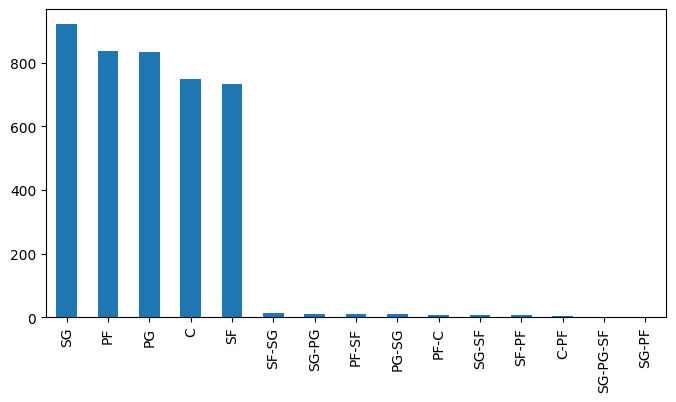

In [88]:
# look at all the different positions listed in the dataset
df['pos'].value_counts().plot.bar(figsize=(8, 4)) 